**1. Import necessary packages and set up the notebook**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import re
import nltk
import string
import warnings

In [3]:
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

**2. Data inspection**

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [5]:
train[train['label'] == 0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0,@user @user welcome here ! i'm it's so #gr8 !


In [6]:
train[train['label'] == 1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk folx running around loving themselves and promoting our greatness
77,78,1,"@user hey, white people: you can call people 'white' by @user #race #identity #medâ¦"
82,83,1,how the #altright uses &amp; insecurity to lure men into #whitesupremacy
111,112,1,@user i'm not interested in a #linguistics that doesn't address #race &amp; . racism is about #power. #raciolinguistics bringsâ¦


In [7]:
print(train.shape, test.shape)

(31962, 3) (17197, 2)


In [8]:
train['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

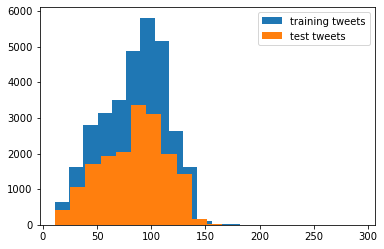

In [9]:
train_length = train['tweet'].str.len()
test_length = test['tweet'].str.len()
plt.hist(train_length, bins=20, label='training tweets')
plt.hist(test_length, bins=20, label="test tweets")
plt.legend()
plt.show()

**3. Data cleaning**

In [10]:
combined = train.append(test, ignore_index=True)
combined.shape

(49159, 3)

In [11]:
def remove_pattern(text, pattern):
    pattern_list = re.findall(pattern, text)
    for specific_pattern in pattern_list:
        text = re.sub(specific_pattern, '', text)
    return text

**a. Remove all words beginning with @**

In [12]:
combined['tidy_tweet'] = np.vectorize(remove_pattern)(combined['tweet'], '@[\w]*')
combined.head(10)

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0.0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦,camping tomorrow dannyâ¦
7,8,0.0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0.0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0.0,@user @user welcome here ! i'm it's so #gr8 !,welcome here ! i'm it's so #gr8 !


**b. Remove all characters which are not alphabets(a-z and A-Z) or hashtag(#)**

In [13]:
combined['tidy_tweet'] = combined['tidy_tweet'].str.replace('[^a-zA-Z#]', " ")
combined.head(10)

<ipython-input-13-bd9fc1123211>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  combined['tidy_tweet'] = combined['tidy_tweet'].str.replace('[^a-zA-Z#]', " ")


,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in ur
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo,huge fan fare and big talking before they leave chaos and pay disputes when they get there #allshowandnogo
6,7,0.0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl,the next school year is the year for exams can t think about that #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0.0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦,we won love the land #allin #cavs #champions #cleveland #clevelandcavaliers
9,10,0.0,@user @user welcome here ! i'm it's so #gr8 !,welcome here i m it s so #gr


**c. Remove all words with length less than 3. Most frequent words have length smaller than 3.**

In [14]:
combined['tidy_tweet'] = combined['tidy_tweet'].apply(
    lambda text: ' '.join([word for word in text.split() if len(word) > 3])
)
combined.head(10)

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunctional selfish drags kids into dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cause they offer wheelchair vans #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation
5,6,0.0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo,huge fare talking before they leave chaos disputes when they there #allshowandnogo
6,7,0.0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl,next school year year exams think about that #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0.0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦,love land #allin #cavs #champions #cleveland #clevelandcavaliers
9,10,0.0,@user @user welcome here ! i'm it's so #gr8 !,welcome here


In [15]:
tokenized_tweet = combined['tidy_tweet'].apply(
    lambda text: text.split()
)
tokenized_tweet.head(10)

0                                                      [when, father, dysfunctional, selfish, drags, kids, into, dysfunction, #run]
1                                          [thanks, #lyft, credit, cause, they, offer, wheelchair, vans, #disapointed, #getthanked]
2                                                                                                           [bihday, your, majesty]
3                                                                                                  [#model, love, take, with, time]
4                                                                                                [factsguide, society, #motivation]
5                                   [huge, fare, talking, before, they, leave, chaos, disputes, when, they, there, #allshowandnogo]
6                                                                                                        [camping, tomorrow, danny]
7    [next, school, year, year, exams, think, about, that, #school, #exams, 

**d. Change each word to its stem**

In [16]:
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(
    lambda word_list: [stemmer.stem(word) for word in word_list]
)
print(tokenized_tweet)

0                                                   [when, father, dysfunct, selfish, drag, kid, into, dysfunct, #run]
1                                    [thank, #lyft, credit, caus, they, offer, wheelchair, van, #disapoint, #getthank]
2                                                                                              [bihday, your, majesti]
3                                                                                     [#model, love, take, with, time]
4                                                                                         [factsguid, societi, #motiv]
                                                             ...                                                      
49154                   [thought, factori, left, right, polaris, #trump, #uselect, #leadership, #polit, #brexit, #blm]
49155                            [feel, like, mermaid, #hairflip, #neverreadi, #formal, #wed, #gown, #dress, #mermaid]
49156    [#hillari, #campaign, today, #ohio, use

In [17]:
combined['tidy_tweet'] = tokenized_tweet
combined.head(10)

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,"[when, father, dysfunct, selfish, drag, kid, into, dysfunct, #run]"
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,"[thank, #lyft, credit, caus, they, offer, wheelchair, van, #disapoint, #getthank]"
2,3,0.0,bihday your majesty,"[bihday, your, majesti]"
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,"[#model, love, take, with, time]"
4,5,0.0,factsguide: society now #motivation,"[factsguid, societi, #motiv]"
5,6,0.0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo,"[huge, fare, talk, befor, they, leav, chao, disput, when, they, there, #allshowandnogo]"
6,7,0.0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦,"[camp, tomorrow, danni]"
7,8,0.0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl,"[next, school, year, year, exam, think, about, that, #school, #exam, #hate, #imagin, #actorslif, #revolutionschool, #girl]"
8,9,0.0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦,"[love, land, #allin, #cav, #champion, #cleveland, #clevelandcavali]"
9,10,0.0,@user @user welcome here ! i'm it's so #gr8 !,"[welcom, here]"


**4. Data visualisation**

In [18]:
def hashtag_extract(tweet):
    hashtags = []
    for word_list in tweet:
        hashtag = [word for word in word_list if word[0] == '#']
        hashtags += hashtag
    return hashtags

In [19]:
tokenized_tweet = combined['tidy_tweet']
positive_hashtag = hashtag_extract(tokenized_tweet[combined['label'] == 0])
negative_hashtag = hashtag_extract(tokenized_tweet[combined['label'] == 1])

[]

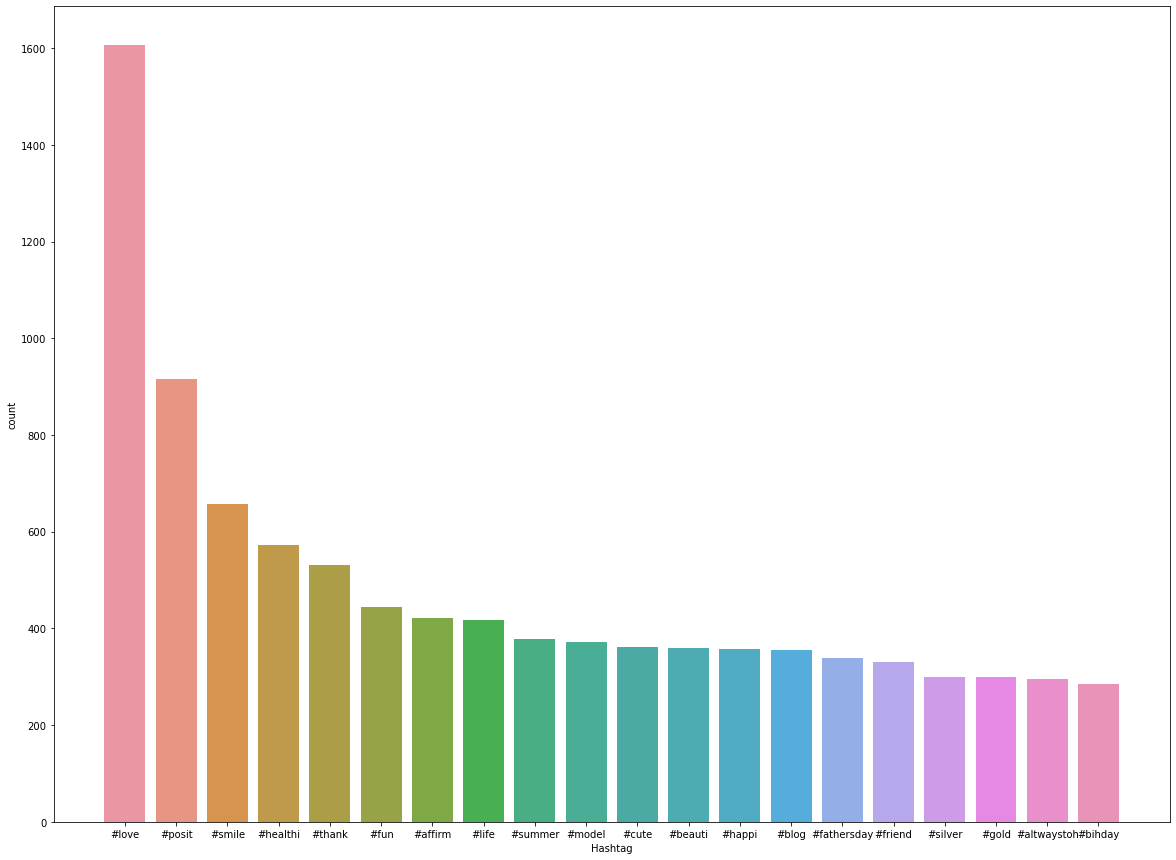

In [20]:
positive = nltk.FreqDist(positive_hashtag)
positive_dataframe = pd.DataFrame(
    {"Hashtag": list(positive.keys()),
    "count": list(positive.values())}
)
positive_head = positive_dataframe.nlargest(columns="count", n=20)
plt.figure(figsize=(20,15))
ax = sns.barplot(data=positive_head, x="Hashtag", y="count")
ax.set(ylabel="count")
plt.plot()

[]

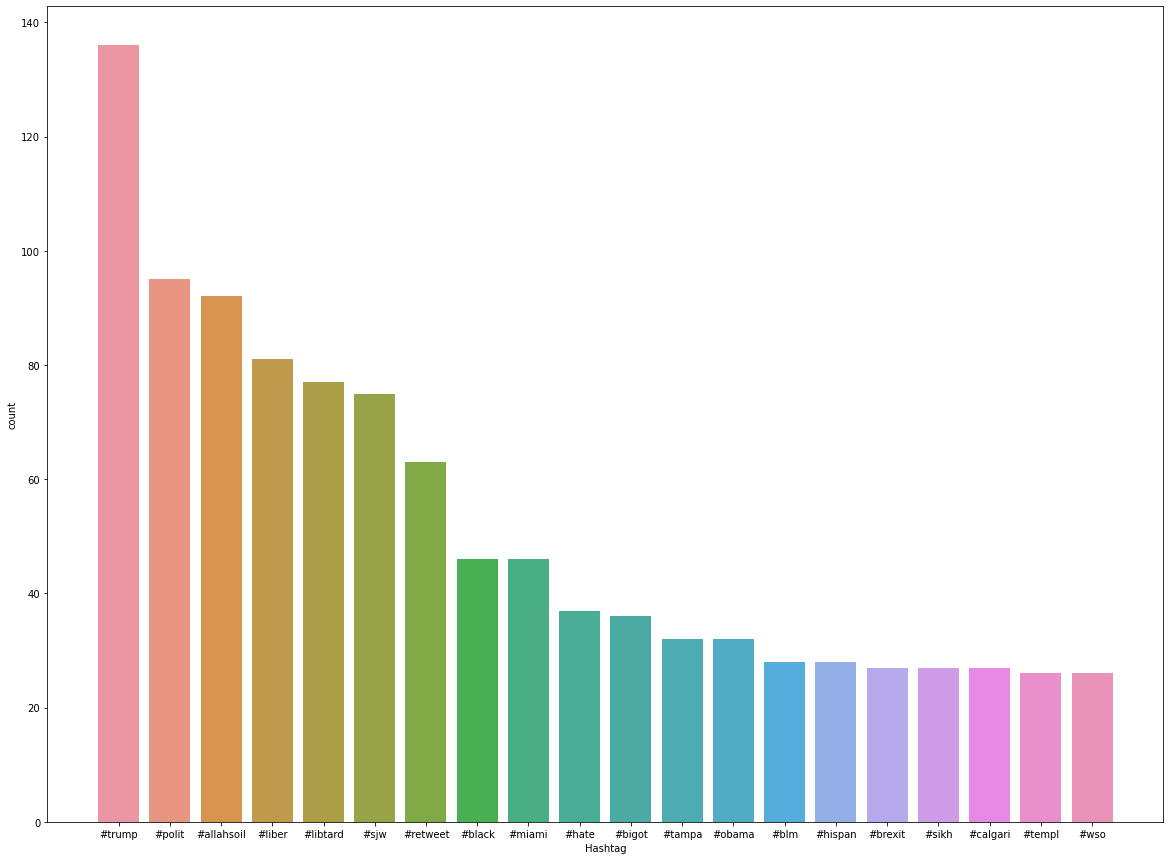

In [21]:
negative = nltk.FreqDist(negative_hashtag)
negative_dataframe = pd.DataFrame(
    {"Hashtag": list(negative.keys()),
    "count": list(negative.values())}
)
negative_head = negative_dataframe.nlargest(columns="count", n=20)
plt.figure(figsize=(20,15))
ax = sns.barplot(data=negative_head, x="Hashtag", y="count")
ax.set(ylabel="count")
plt.plot()

**5. Text processing**

**a. Bag of Words**

Converts a collection of text documents to a matrix of token counts. It collects important words from all of the content and then determines the count of each word in each document of the content. Here each tidy tweet is considered a separate document and the collection of all tweets is the complete content. The number of words is capped at 5000.

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(max_df=0.9, min_df=2, max_features=5000, stop_words='english')
X_count = count_vectorizer.fit_transform(tokenized_tweet.apply(lambda x: " ".join(x)))
print(X_count.shape)
# print(count_vectorizer.get_feature_names())

(49159, 5000)


**b. TF-IDF**

Converts a collection of raw documents to a matrix of TF-IDF features. It collects important words from all of the content and then determines the count of each word in each document of the content. Next it applies the TF-IDF transformer which takes into account the frequency of each word in the content. Here each tidy tweet is considered a separate document and the collection of all tweets is the complete content. The number of words is capped at 5000.

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.9, min_df=2, max_features=5000, stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(tokenized_tweet.apply(lambda x: " ".join(x)))
print(X_tfidf.shape)
# print(tfidf_vectorizer.get_feature_names())

(49159, 5000)


**c. Word to Vector**

In [24]:
import gensim

vector = gensim.models.Word2Vec(
    tokenized_tweet, vector_size=500, window=5,
    min_count=2, sg=1, hs=0,
    negative=10, workers=2, seed=46
)
vector.train(tokenized_tweet, total_examples=len(combined['tidy_tweet']), epochs=50)

C:\Users\souna\anaconda3\envs\ml\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


(16277246, 18840050)

In [25]:
def make_vector(tokens, size):
    vec = np.zeros((1, size))
    count = 0
    for word in tokens:
        try:
            vec += vector.wv[word].reshape((1, size))
            count += 1
        except KeyError:
            pass
    return vec/count if count != 0 else vec

In [26]:
X_vector = np.zeros((len(tokenized_tweet), 500))
for i in range(len(tokenized_tweet)):
    X_vector[i, :] = make_vector(tokenized_tweet[i], 500)
print(X_vector.shape)

(49159, 500)


In [27]:
from sklearn.model_selection import train_test_split

def split(data):
    X_train, X_test = data[:31962, :], data[31962:, :]
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, train['label'], test_size=0.2)
    return (X_train, y_train), (X_valid, y_valid), X_test

**6. Making models**

In [28]:
from sklearn.metrics import plot_confusion_matrix, plot_det_curve
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [29]:
def plot(classifier, X, y):
    fig, ax = plt.subplots(2, 2, figsize=(20, 15))
    plot_confusion_matrix(classifier, X, y, ax=ax[0, 0])
    plot_det_curve(classifier, X, y, ax=ax[0, 1])
    plot_precision_recall_curve(classifier, X, y, ax=ax[1, 0])
    plot_roc_curve(classifier, X, y, ax=ax[1, 1])
    plt.show()

In [30]:
from sklearn.linear_model import LogisticRegression

def log_reg(X, y, filename):
    X_train, X_valid, X_test = X
    y_train, y_valid = y
    
    log_reg = LogisticRegression(max_iter=10000, solver="saga", n_jobs=-1)
    log_reg.fit(X_train, y_train)
    
    y_pred = log_reg.predict(X_valid)
    
    print("Logistic Regression")
    print("Accuracy : ", accuracy_score(y_valid, y_pred))
    print("Precision : ", precision_score(y_valid, y_pred))
    print("Recall : ", recall_score(y_valid, y_pred))
    print("F1_score : ", f1_score(y_valid, y_pred))
    print('\n')
    
    plot(log_reg, X_valid, y_valid)
    
    pred = log_reg.predict(X_test)
    test['label'] = pred
    submission = test[['id', 'label']]
    submission.to_csv(filename, index=False)

In [31]:
from sklearn.svm import LinearSVC

def svm(X, y, filename):
    X_train, X_valid, X_test = X
    y_train, y_valid = y
    
    svm_clf = LinearSVC(max_iter=10000)
    svm_clf.fit(X_train, y_train)
    
    y_pred = svm_clf.predict(X_valid)
    
    print("Support Vector Machines")
    print("Accuracy : ", accuracy_score(y_valid, y_pred))
    print("Precision : ", precision_score(y_valid, y_pred))
    print("Recall : ", recall_score(y_valid, y_pred))
    print("F1_score : ", f1_score(y_valid, y_pred))
    print('\n')
    
    plot(svm_clf, X_valid, y_valid)
    
    pred = svm_clf.predict(X_test)
    test['label'] = pred
    submission = test[['id', 'label']]
    submission.to_csv(filename, index=False)

In [32]:
from sklearn.ensemble import RandomForestClassifier

def forest(X, y, filename):
    X_train, X_valid, X_test = X
    y_train, y_valid = y
    
    forest_clf = RandomForestClassifier(n_estimators=500, random_state=46, n_jobs=-1)
    forest_clf.fit(X_train, y_train)
    
    y_pred = forest_clf.predict(X_valid)
    
    print("Random Forest")
    print("Accuracy : ", accuracy_score(y_valid, y_pred))
    print("Precision : ", precision_score(y_valid, y_pred))
    print("Recall : ", recall_score(y_valid, y_pred))
    print("F1_score : ", f1_score(y_valid, y_pred))
    print('\n')
    
    plot(forest_clf, X_valid, y_valid)
    
    pred = forest_clf.predict(X_test)
    test['label'] = pred
    submission = test[['id', 'label']]
    submission.to_csv(filename, index=False)

In [33]:
from xgboost import XGBClassifier

def boost(X, y, filename):
    X_train, X_valid, X_test = X
    y_train, y_valid = y
    
    boost_clf = XGBClassifier(
        n_estimators=500, max_depth=6, random_state=46,
        n_jobs=-1, use_label_encoder=False
    )
    boost_clf.fit(X_train, y_train, eval_metric='logloss')
    
    y_pred = boost_clf.predict(X_valid)
    
    print("Extreme Gradient Boosting")
    print("Accuracy : ", accuracy_score(y_valid, y_pred))
    print("Precision : ", precision_score(y_valid, y_pred))
    print("Recall : ", recall_score(y_valid, y_pred))
    print("F1_score : ", f1_score(y_valid, y_pred))
    print('\n')
    
    plot(boost_clf, X_valid, y_valid)
    
    pred = boost_clf.predict(X_test)
    test['label'] = pred
    submission = test[['id', 'label']]
    submission.to_csv(filename, index=False)

**7. Model training**

**a. Bag of words feature**

In [34]:
(X_train, y_train), (X_valid, y_valid), X_test = split(X_count)
X = [X_train, X_valid, X_test]
y = [y_train, y_valid]

Logistic Regression
Accuracy :  0.9682465196308463
Precision :  0.87890625
Recall :  0.5667506297229219
F1_score :  0.6891271056661562




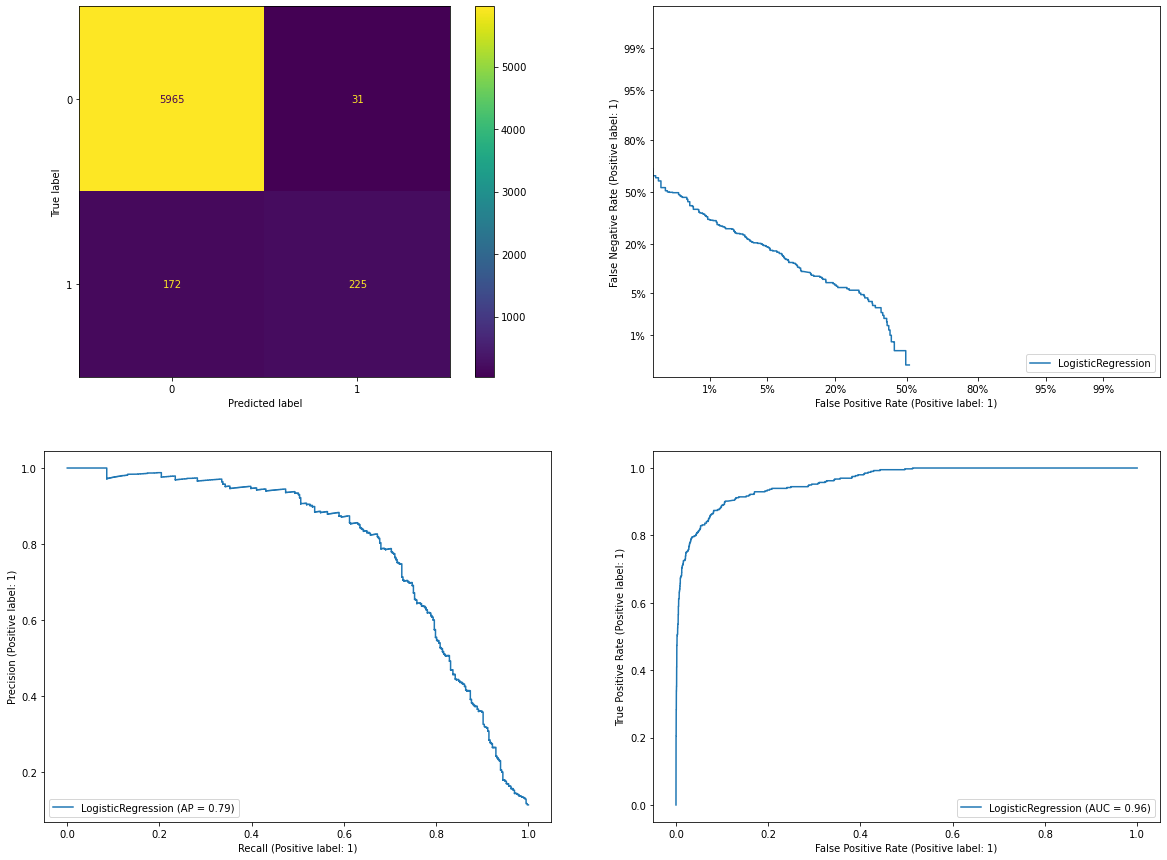

In [35]:
log_reg(X, y, filename="results/logreg_bow.csv")

Support Vector Machines
Accuracy :  0.9669951509463476
Precision :  0.7583333333333333
Recall :  0.6876574307304786
F1_score :  0.7212681638044914




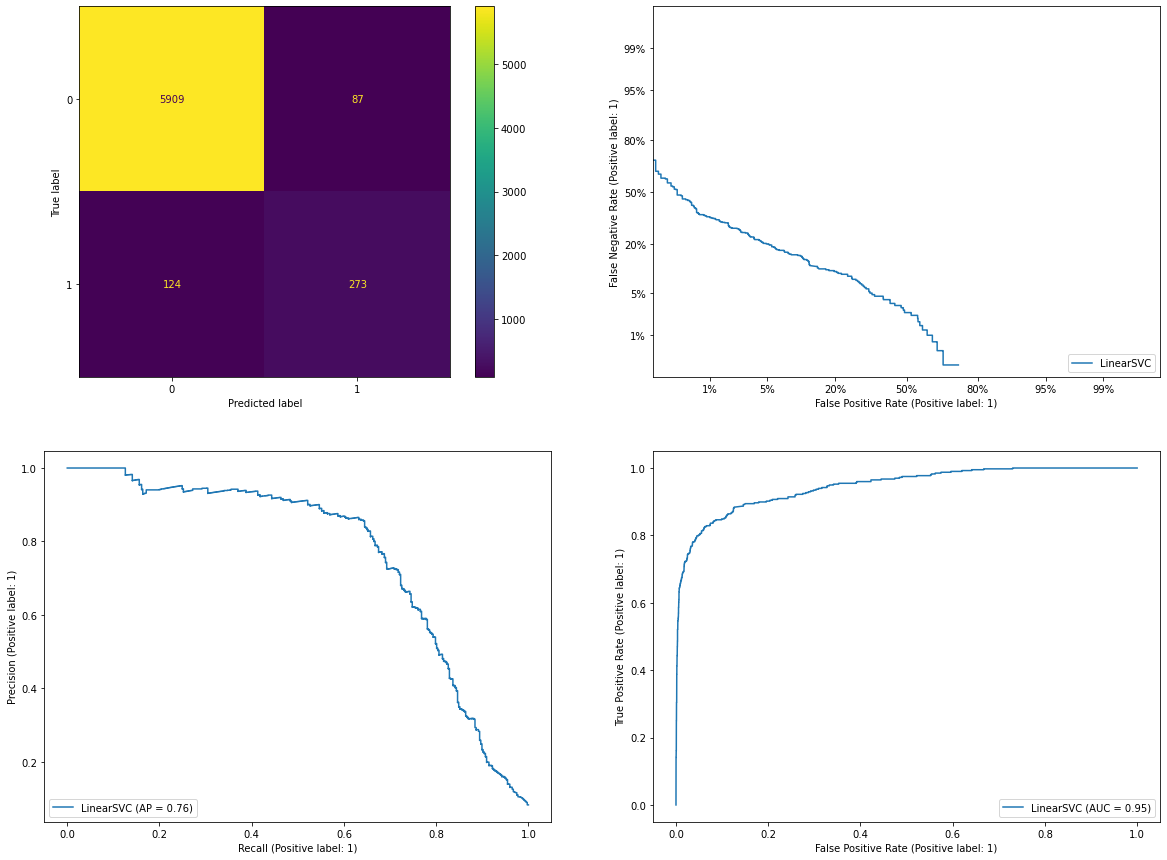

In [36]:
svm(X, y, filename="results/svm_bow.csv")

Random Forest
Accuracy :  0.9704364148287189
Precision :  0.811377245508982
Recall :  0.6826196473551638
F1_score :  0.7414500683994529




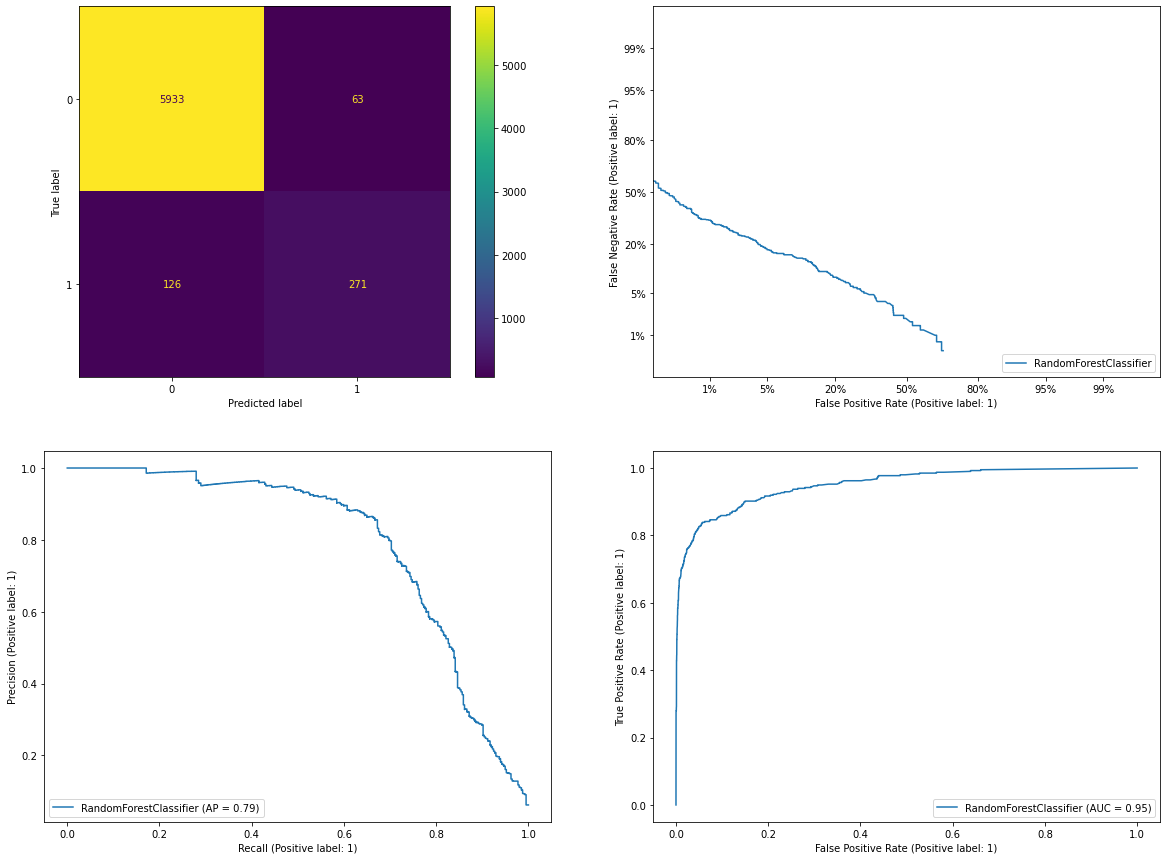

In [37]:
forest(X, y, filename="results/forest_bow.csv")

Extreme Gradient Boosting
Accuracy :  0.9673079931174723
Precision :  0.873015873015873
Recall :  0.5541561712846348
F1_score :  0.6779661016949152




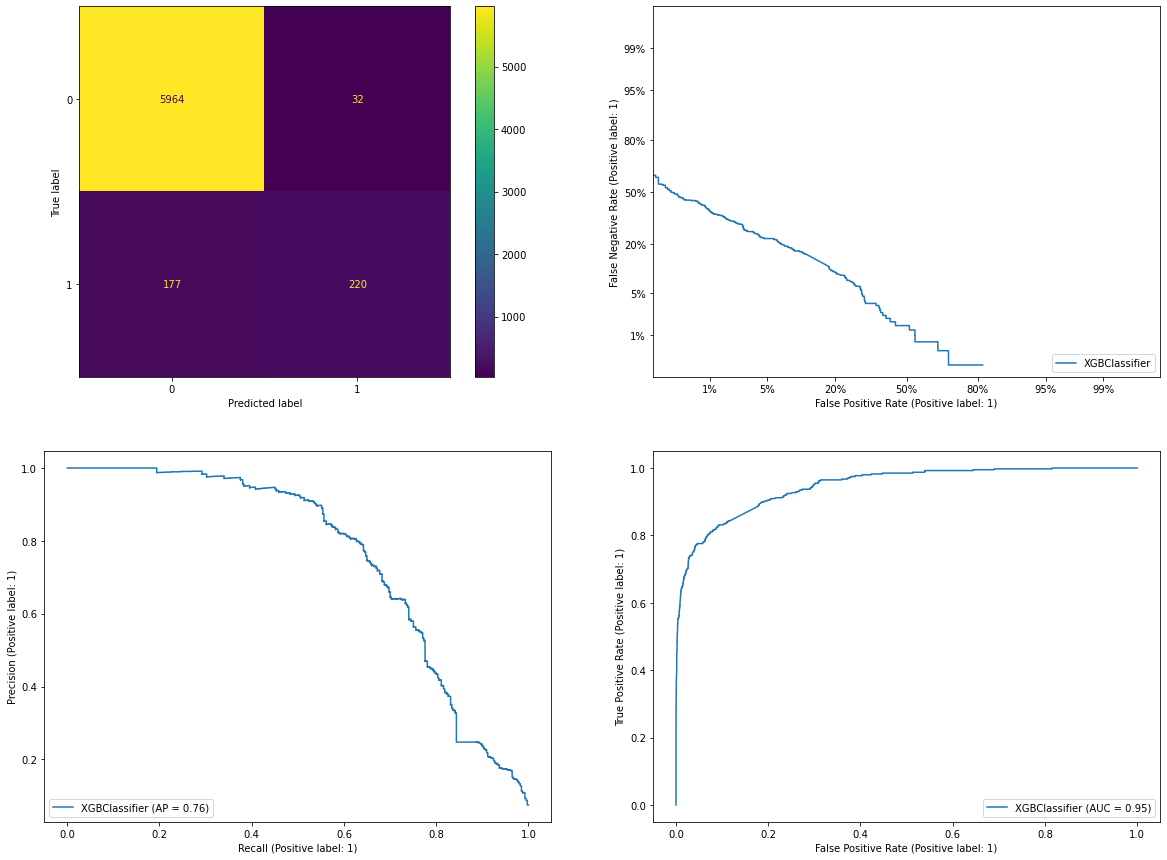

In [38]:
boost(X, y, filename="results/boost_bow.csv")

**b. TF-IDF features**

In [39]:
(X_train, y_train), (X_valid, y_valid), X_test = split(X_tfidf)
X = [X_train, X_valid, X_test]
y = [y_train, y_valid]

Logistic Regression
Accuracy :  0.9551071484436102
Precision :  0.9056603773584906
Recall :  0.34615384615384615
F1_score :  0.5008695652173913




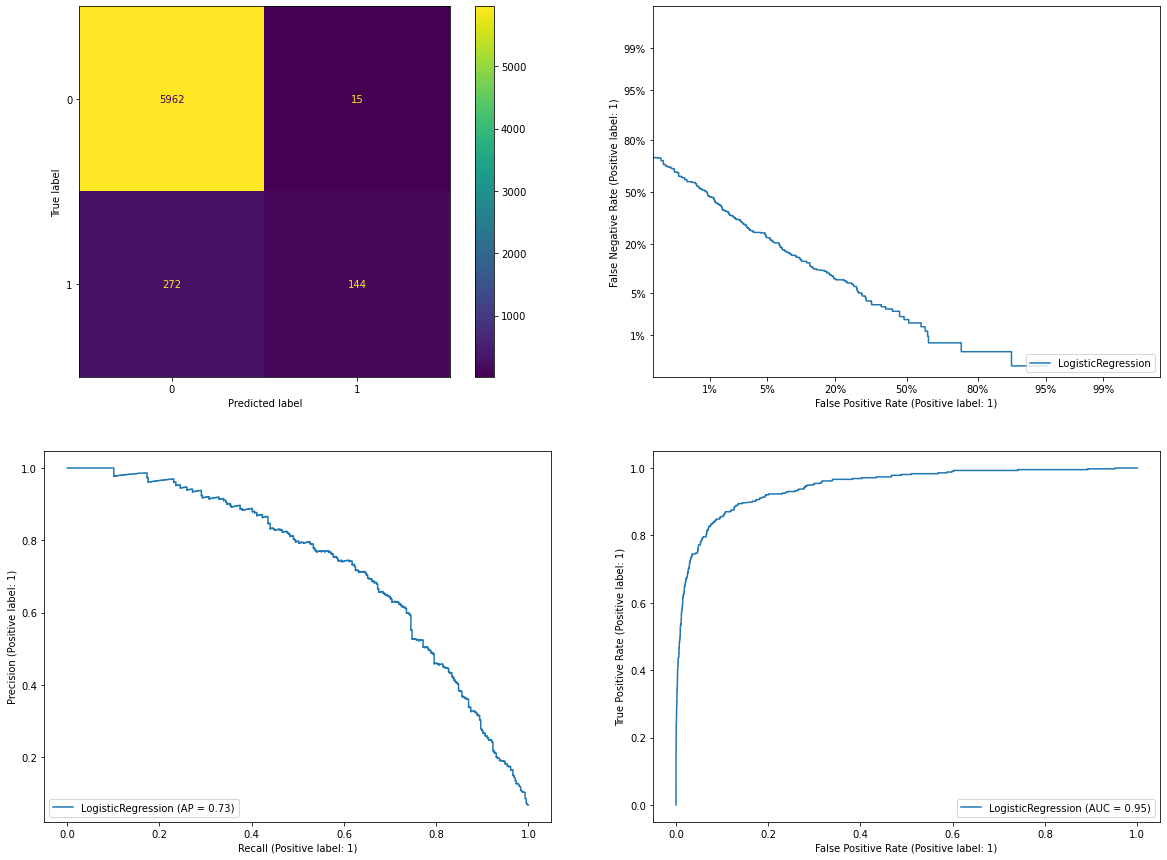

In [40]:
log_reg(X, y, filename="results/logreg_tfidf.csv")

Support Vector Machines
Accuracy :  0.9640231503206632
Precision :  0.8120805369127517
Recall :  0.5817307692307693
F1_score :  0.6778711484593838




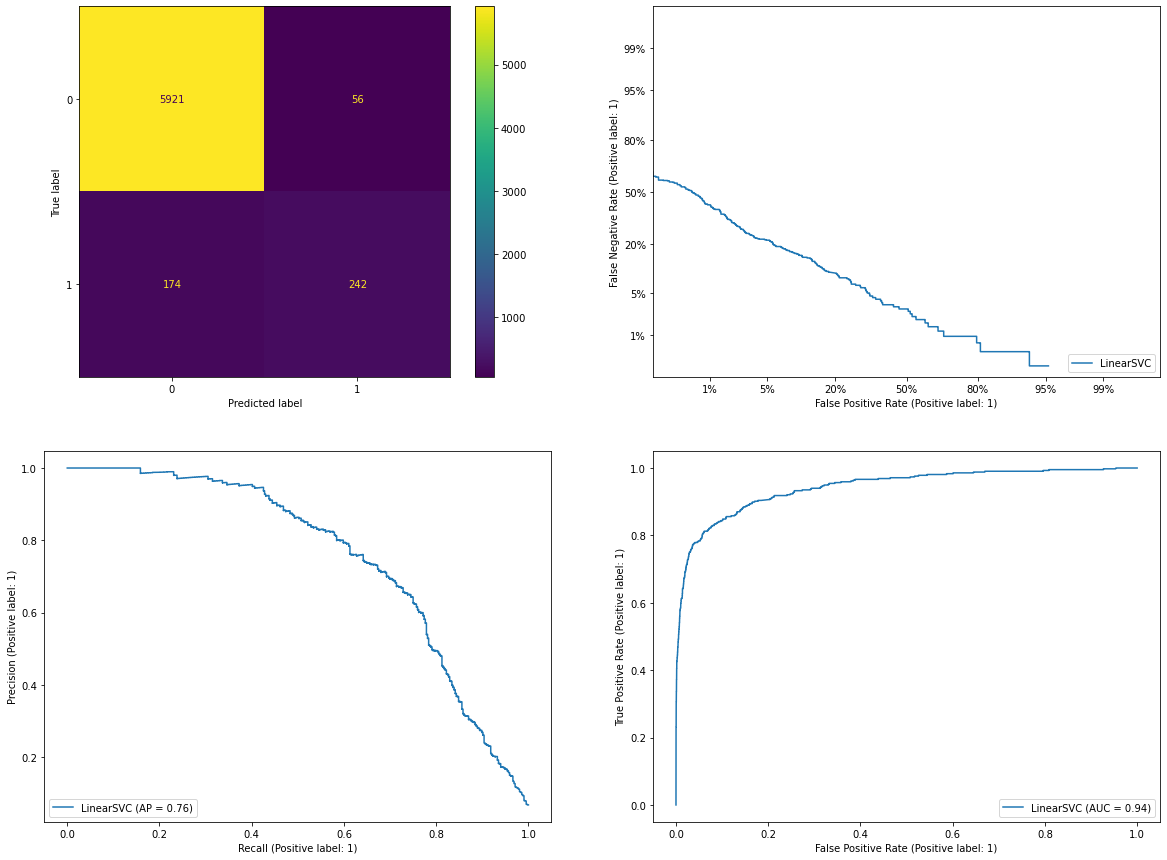

In [41]:
svm(X, y, filename="results/svm_tfidf.csv")

Random Forest
Accuracy :  0.9635538870639763
Precision :  0.8080808080808081
Recall :  0.5769230769230769
F1_score :  0.673211781206171




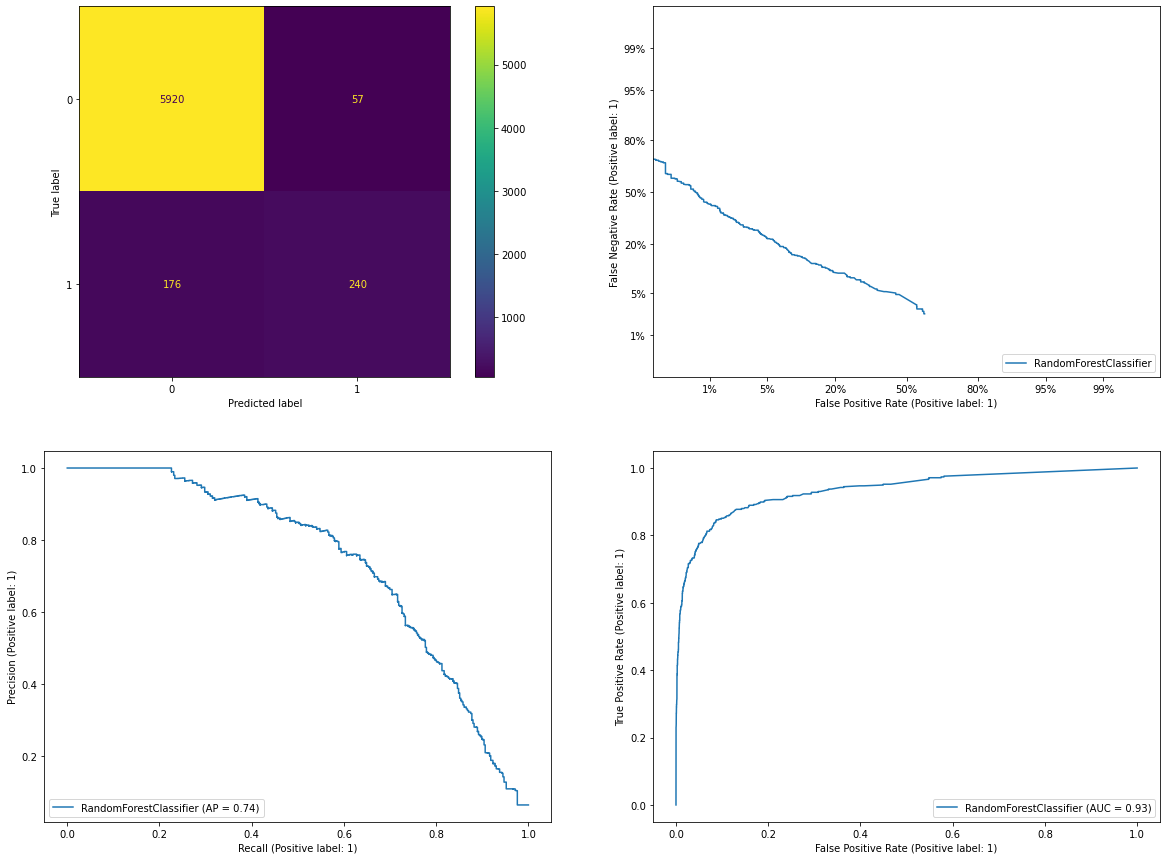

In [42]:
forest(X, y, filename="results/forest_tfidf.csv")

Extreme Gradient Boosting
Accuracy :  0.9576098858126075
Precision :  0.7843137254901961
Recall :  0.4807692307692308
F1_score :  0.5961251862891207




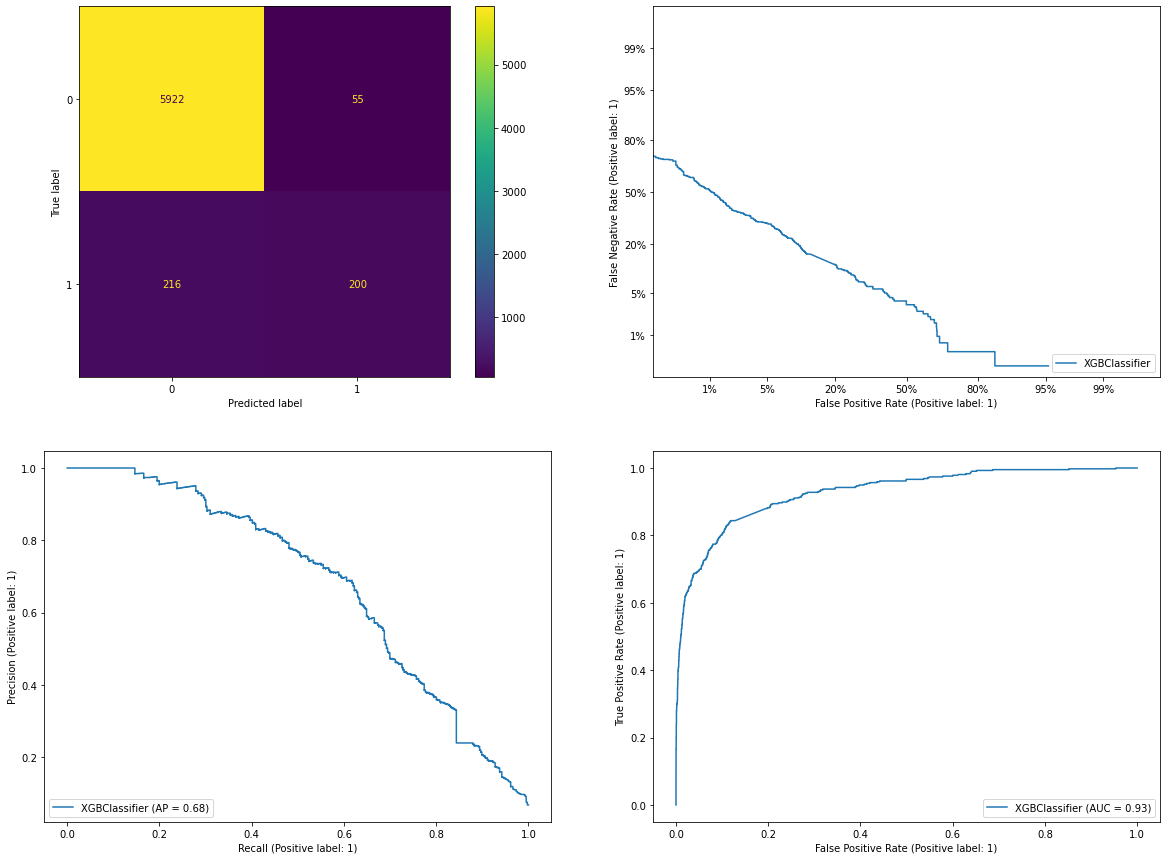

In [43]:
boost(X, y, filename="results/boost_tfidf.csv")

**c. Word to Vector features (Word Embeddings)**

In [44]:
(X_train, y_train), (X_valid, y_valid), X_test = split(X_vector)
X = [X_train, X_valid, X_test]
y = [y_train, y_valid]

Logistic Regression
Accuracy :  0.9549507273580479
Precision :  0.7529411764705882
Recall :  0.5565217391304348
F1_score :  0.6400000000000001




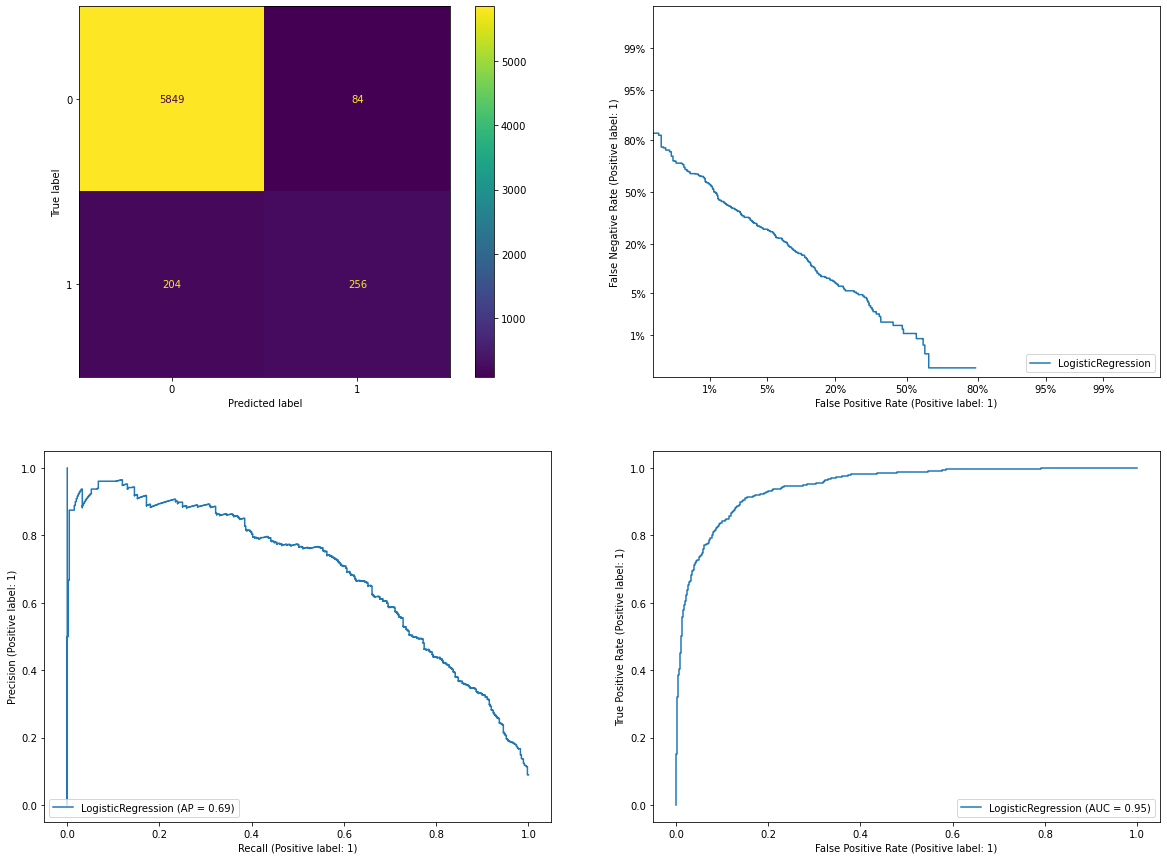

In [45]:
log_reg(X, y, filename="results/logreg_vector.csv")

Support Vector Machines
Accuracy :  0.9543250430157986
Precision :  0.7545454545454545
Recall :  0.5413043478260869
F1_score :  0.6303797468354431




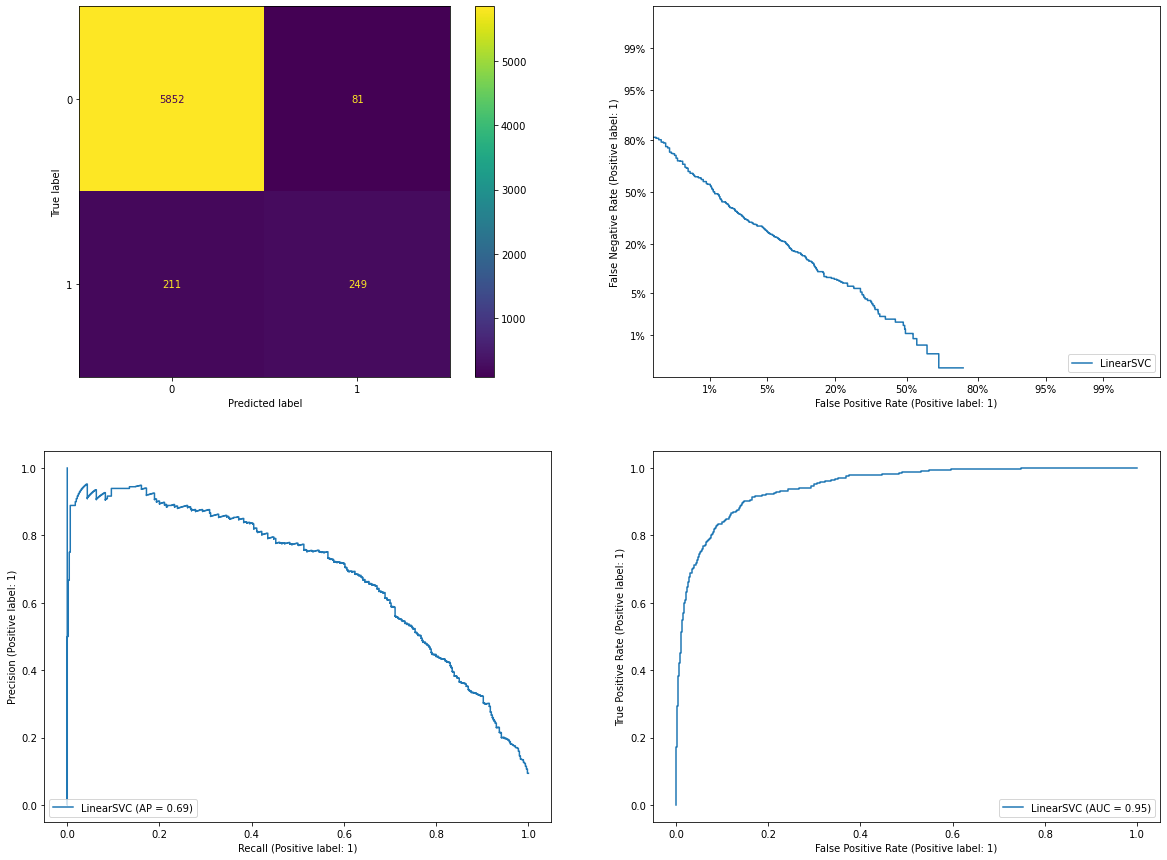

In [46]:
svm(X, y, filename="results/svm_vector.csv")

Random Forest
Accuracy :  0.9497888315344909
Precision :  0.9602649006622517
Recall :  0.31521739130434784
F1_score :  0.4746317512274959




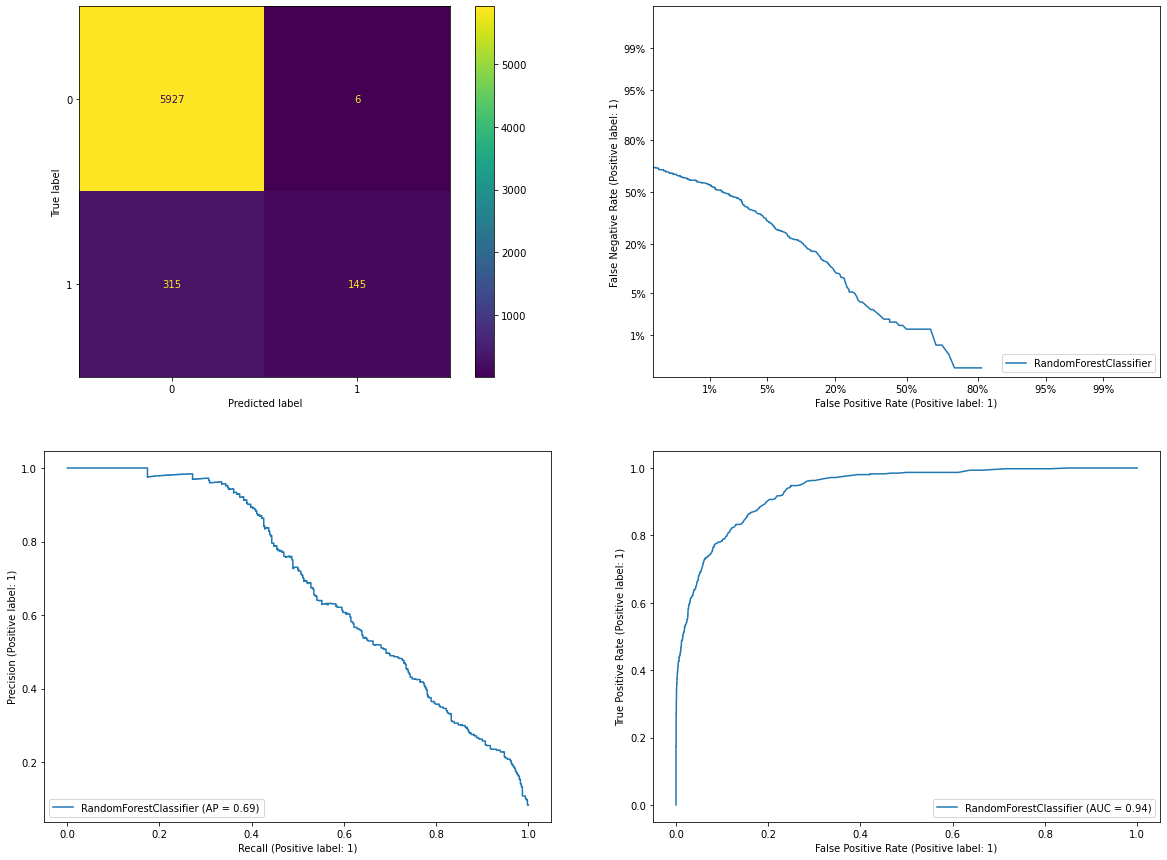

In [47]:
forest(X, y, filename="results/forest_vector.csv")

Extreme Gradient Boosting
Accuracy :  0.9637103081495385
Precision :  0.8653846153846154
Recall :  0.5869565217391305
F1_score :  0.6994818652849742




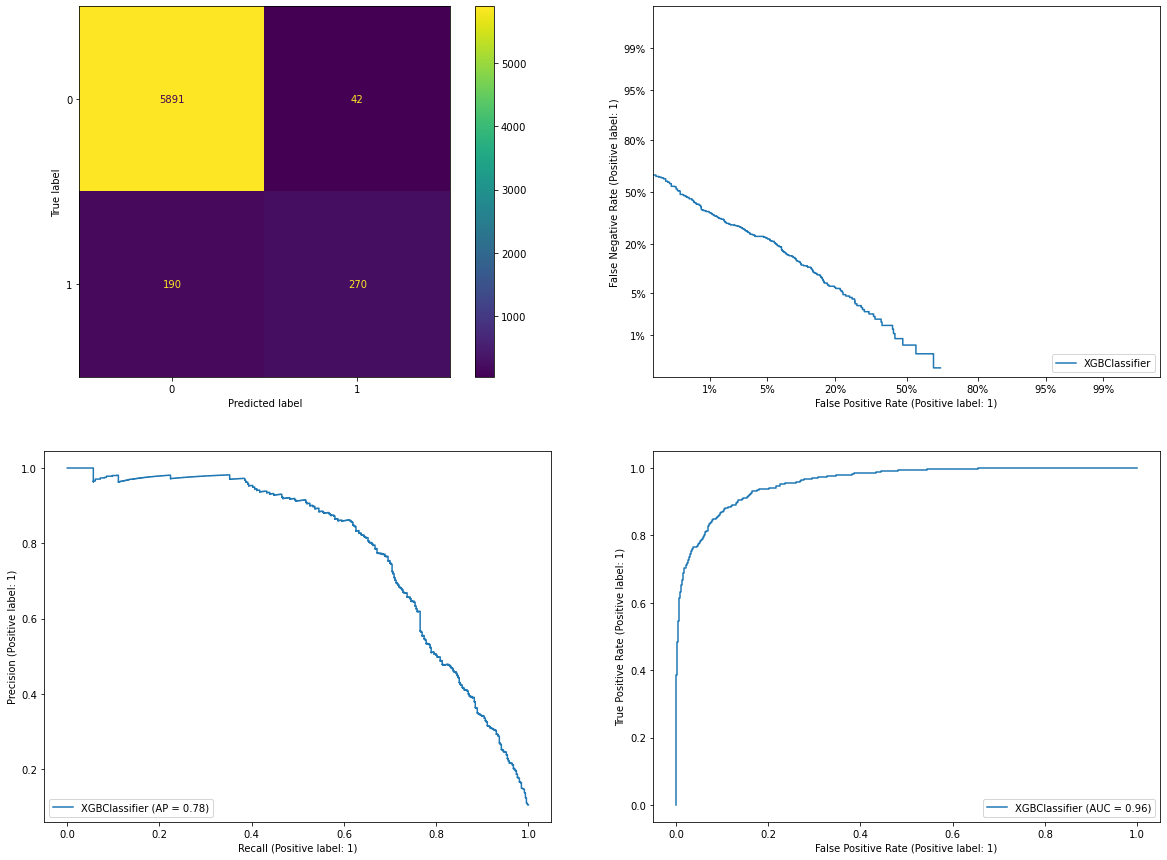

In [48]:
boost(X, y, filename="results/boost_vector.csv")

**8. Parameter tuning**

In [49]:
import xgboost as xgb

d_train = xgb.DMatrix(X_train, label=y_train)
d_valid = xgb.DMatrix(X_valid, label=y_valid)
d_test = xgb.DMatrix(X_test)

In [50]:
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'max_depth': 6,
    'min_child_weight': 1,
    'eta': 0.3,
    'subsample': 1,
    'colsample_bytree': 1
}

def custom_evaluation(y_pred, d_train):
    y_train = d_train.get_label().astype(np.int)
    y_pred = (y_pred >= 0.3).astype(np.int)
    return [('f1_score', f1_score(y_train, y_pred))]

**a. Tuning *max_depth* and *min_child_weight***

In [51]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(6, 10)
        for min_child_weight in range(5, 8)
]

max_f1 = 0
for max_depth, min_child_weight in gridsearch_params:
    cv_results = xgb.cv(
        params, d_train, feval = custom_evaluation,
        num_boost_round=200, maximize=True,
        seed=42, nfold=5, early_stopping_rounds=10
    )
    
    mean_f1 = cv_results['test-f1_score-mean'].max()
    boost_rounds = cv_results['test-f1_score-mean'].argmax()
    print(f"CV with max_depth {max_depth} min_child_weight {min_child_weight} : F1_score {mean_f1} for {boost_rounds} rounds")
    
    if mean_f1 > max_f1:
        max_f1 = mean_f1
        params["max_depth"] = max_depth
        params["min_child_weight"] = min_child_weight

best_params = params['max_depth'], params['min_child_weight']
print(f"Best params : max_depth = {best_params[0]}, min_child_weight = {best_params[1]}, F1_score = {max_f1}")

CV with max_depth 6 min_child_weight 5 : F1_score 0.6262984 for 115 rounds
CV with max_depth 6 min_child_weight 6 : F1_score 0.6239884 for 74 rounds
CV with max_depth 6 min_child_weight 7 : F1_score 0.6239884 for 74 rounds
CV with max_depth 7 min_child_weight 5 : F1_score 0.6239884 for 74 rounds
CV with max_depth 7 min_child_weight 6 : F1_score 0.6239884 for 74 rounds
CV with max_depth 7 min_child_weight 7 : F1_score 0.6239884 for 74 rounds
CV with max_depth 8 min_child_weight 5 : F1_score 0.6239884 for 74 rounds
CV with max_depth 8 min_child_weight 6 : F1_score 0.6239884 for 74 rounds
CV with max_depth 8 min_child_weight 7 : F1_score 0.6239884 for 74 rounds
CV with max_depth 9 min_child_weight 5 : F1_score 0.6239884 for 74 rounds
CV with max_depth 9 min_child_weight 6 : F1_score 0.6239884 for 74 rounds
CV with max_depth 9 min_child_weight 7 : F1_score 0.6239884 for 74 rounds
Best params : max_depth = 6, min_child_weight = 5, F1_score = 0.6262984


**b. Tuning *subsample* and *colsample_bytree***

In [52]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10 for i in range(5, 10)]
        for colsample in [i/10 for i in range(5, 10)]
]

max_f1 = 0
for subsample, colsample in gridsearch_params:
    cv_results = xgb.cv(
        params, d_train, feval = custom_evaluation,
        num_boost_round=200, maximize=True,
        seed=42, nfold=5, early_stopping_rounds=10
    )
    
    mean_f1 = cv_results['test-f1_score-mean'].max()
    boost_rounds = cv_results['test-f1_score-mean'].argmax()
    print(f"CV with subsample {subsample} colsample_bytree {colsample} : F1_score {mean_f1} for {boost_rounds} rounds")
    
    if mean_f1 > max_f1:
        max_f1 = mean_f1
        params["subsample"] = subsample
        params["colsample_bytree"] = colsample

best_params = params["subsample"], params["colsample_bytree"]
print(f"Best params : subsample = {best_params[0]}, colsample_bytree = {best_params[1]}, F1_score = {max_f1}")

CV with subsample 0.5 colsample_bytree 0.5 : F1_score 0.6239884 for 74 rounds
CV with subsample 0.5 colsample_bytree 0.6 : F1_score 0.6340806 for 90 rounds
CV with subsample 0.5 colsample_bytree 0.7 : F1_score 0.6086898000000001 for 44 rounds
CV with subsample 0.5 colsample_bytree 0.8 : F1_score 0.6086898000000001 for 44 rounds
CV with subsample 0.5 colsample_bytree 0.9 : F1_score 0.6086898000000001 for 44 rounds
CV with subsample 0.6 colsample_bytree 0.5 : F1_score 0.6086898000000001 for 44 rounds
CV with subsample 0.6 colsample_bytree 0.6 : F1_score 0.6086898000000001 for 44 rounds
CV with subsample 0.6 colsample_bytree 0.7 : F1_score 0.6086898000000001 for 44 rounds
CV with subsample 0.6 colsample_bytree 0.8 : F1_score 0.6086898000000001 for 44 rounds
CV with subsample 0.6 colsample_bytree 0.9 : F1_score 0.6086898000000001 for 44 rounds
CV with subsample 0.7 colsample_bytree 0.5 : F1_score 0.6086898000000001 for 44 rounds
CV with subsample 0.7 colsample_bytree 0.6 : F1_score 0.60868

**c. Tuning *learning_rate***

In [53]:
gridsearch_params = [0.3, 0.2, 0.1, 0.05, 0.01, 0.005]

max_f1 = 0
for eta in gridsearch_params:
    cv_results = xgb.cv(
        params, d_train, feval = custom_evaluation,
        num_boost_round=1000, maximize=True,
        seed=42, nfold=5, early_stopping_rounds=10
    )
    
    mean_f1 = cv_results['test-f1_score-mean'].max()
    boost_rounds = cv_results['test-f1_score-mean'].argmax()
    print(f"CV with eta {eta} : F1_score {mean_f1} for {boost_rounds} rounds")
    
    if mean_f1 > max_f1:
        max_f1 = mean_f1
        params["eta"] = eta

best_params = params["eta"]
print(f"Best params : eta = {best_params}, F1_score = {max_f1}")

CV with eta 0.3 : F1_score 0.6086898000000001 for 44 rounds
CV with eta 0.2 : F1_score 0.6086898000000001 for 44 rounds
CV with eta 0.1 : F1_score 0.6086898000000001 for 44 rounds
CV with eta 0.05 : F1_score 0.6086898000000001 for 44 rounds
CV with eta 0.01 : F1_score 0.6086898000000001 for 44 rounds
CV with eta 0.005 : F1_score 0.6086898000000001 for 44 rounds
Best params : eta = 0.3, F1_score = 0.6086898000000001


**d. Training final model**

In [54]:
print(params)

{'objective': 'binary:logistic', 'eval_metric': 'logloss', 'max_depth': 6, 'min_child_weight': 5, 'eta': 0.3, 'subsample': 0.5, 'colsample_bytree': 0.6}


In [55]:
xgb_model = xgb.train(
    params, d_train, feval=custom_evaluation,
    num_boost_round=1000, maximize=True,
    evals = [(d_valid, 'validation')],
    early_stopping_rounds=10
)

pred = xgb_model.predict(d_test)
test['label'] = (pred >= 0.3).astype(np.int)
submission = test[['id', 'label']]
submission.to_csv('final.csv', index=False)

[0]	validation-logloss:0.49179	validation-f1_score:0.18497
[1]	validation-logloss:0.37904	validation-f1_score:0.27907
[2]	validation-logloss:0.30831	validation-f1_score:0.32143
[3]	validation-logloss:0.26079	validation-f1_score:0.34568
[4]	validation-logloss:0.22833	validation-f1_score:0.37050
[5]	validation-logloss:0.20711	validation-f1_score:0.38095
[6]	validation-logloss:0.19104	validation-f1_score:0.38449
[7]	validation-logloss:0.17898	validation-f1_score:0.41459
[8]	validation-logloss:0.16979	validation-f1_score:0.41639
[9]	validation-logloss:0.16344	validation-f1_score:0.44194
[10]	validation-logloss:0.15719	validation-f1_score:0.44657
[11]	validation-logloss:0.15333	validation-f1_score:0.46372
[12]	validation-logloss:0.14943	validation-f1_score:0.46782
[13]	validation-logloss:0.14757	validation-f1_score:0.48541
[14]	validation-logloss:0.14566	validation-f1_score:0.50227
[15]	validation-logloss:0.14403	validation-f1_score:0.50000
[16]	validation-logloss:0.14287	validation-f1_scor